In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sys

sys.path.append('../src')
import pwa_cluster as pwac

In [4]:
%load_ext autoreload
%autoreload 2

# Loading Data from Experiment

In [6]:
filestem = '../../pwa_id/'
filename = filestem + 'csv/lmpc-9915.h5' #lmpc-9915.h5  rec-9915.h5

f = h5py.File(filename, 'r')

lmpc_data = {}

for key in f.keys():
    print(str(f[key]), key)
    if type(f[key]) == h5py._hl.dataset.Dataset:
        lmpc_data[key] = np.array(f[key])
    

<HDF5 dataset "c_Psi": shape (3, 2931), type "<f8"> c_Psi
<HDF5 dataset "c_Vx": shape (3, 2931), type "<f8"> c_Vx
<HDF5 dataset "c_Vy": shape (4, 2931), type "<f8"> c_Vy
<HDF5 dataset "cmd": shape (2, 2931), type "<f8"> cmd
<HDF5 dataset "coeffConst": shape (10000, 5, 2, 6), type "<f8"> coeffConst
<HDF5 dataset "coeffCost": shape (10000, 2, 6), type "<f8"> coeffCost
<HDF5 dataset "coeffX": shape (9, 2931), type "<f8"> coeffX
<HDF5 dataset "coeffY": shape (9, 2931), type "<f8"> coeffY
<HDF5 dataset "cost": shape (6, 2931), type "<f8"> cost
<HDF5 dataset "cpsi": shape (30, 3, 5000), type "<f8"> cpsi
<HDF5 dataset "curv": shape (9, 2931), type "<f8"> curv
<HDF5 dataset "cvx": shape (30, 3, 5000), type "<f8"> cvx
<HDF5 dataset "cvy": shape (30, 4, 5000), type "<f8"> cvy
<HDF5 dataset "eps_alpha": shape (30, 5000, 6), type "<f8"> eps_alpha
<HDF5 dataset "final_counter": shape (29,), type "<f8"> final_counter
<HDF5 dataset "input": shape (30, 2, 5000), type "<f8"> input
<HDF5 group "/lapStat

In [7]:
states = lmpc_data["state"]
inputs = lmpc_data["cmd"]
print(states.shape)

(7, 2931)


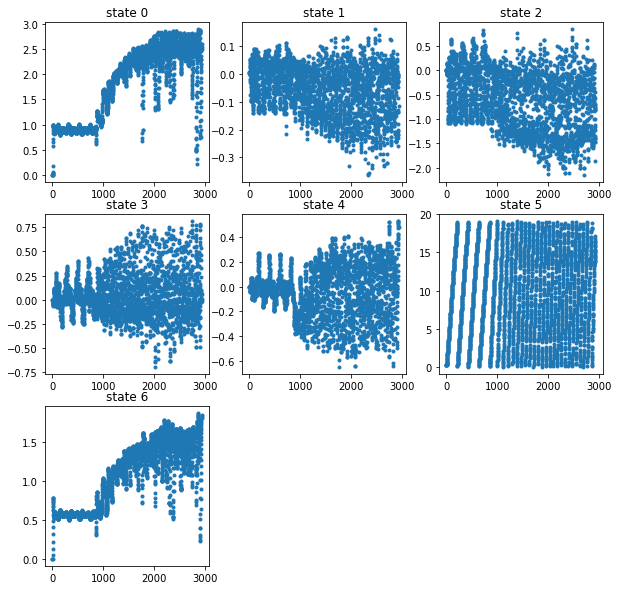

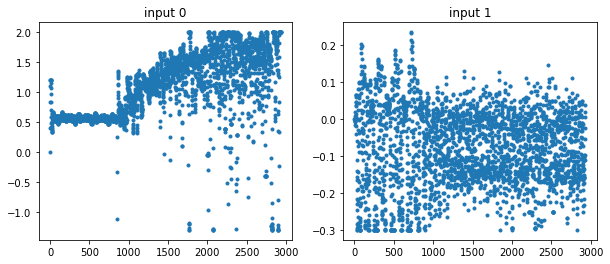

In [8]:
plt.figure(figsize=[10,10]);
for ind in range(states.shape[0]):
    plt.subplot(3,3,ind+1); plt.plot(states[ind], '.'); plt.title('state ' + str(ind))

plt.figure(figsize=[10,4]);
for ind in range(inputs.shape[0]):
    plt.subplot(1,2,ind+1); plt.plot(inputs[ind], '.'); plt.title('input ' + str(ind))

# shift control and state by one -- pick s (where in track) and v_x (speed)

# states: 0 vx, 1 vy, 2 yaw (psi) rate, 3 psi, 4 ey, 5 s, (low pass) filtered vx/acc
# inputs: acceleration, steering
# acceleration, speed, psi dot, vy (symmetric around vy pos or neg)

In [11]:
y.shape

(2930, 7)

In [9]:
y = states[:,1:].T
z = np.vstack([states[:,:-1], inputs[:,:-1]]).T # to do: correct indexing on inputs?

In [13]:
clustering = pwac.ClusterPWA.from_num_clusters(z, y, 10, z_cutoff=7)


In [14]:
clustering.fit_clusters(verbose=True)

assigning datapoints to clusters
updating models
6.01482890344
assigning datapoints to clusters
updating models
1.04369558923
assigning datapoints to clusters
updating models
0.844790594608
assigning datapoints to clusters
updating models
0.622481120894
assigning datapoints to clusters
updating models
0.255716455721
assigning datapoints to clusters
updating models
0.187257098727
assigning datapoints to clusters
updating models
0.140960722833
assigning datapoints to clusters
updating models
0.096784599268
assigning datapoints to clusters
updating models
0.078899858139
assigning datapoints to clusters
updating models
0.0817279754778
assigning datapoints to clusters
updating models
0.0644966427866
assigning datapoints to clusters
updating models
0.0564397661715
assigning datapoints to clusters
updating models
0.0522401422273
assigning datapoints to clusters
updating models
0.0300399165365
assigning datapoints to clusters
updating models
0.0269525181788
assigning datapoints to clusters
upd

In [15]:
centroids = clustering.centroids
cluster_labels = clustering.cluster_labels
thetas = clustering.thetas

In [41]:
y_ind = 0
z_ind = [5,0]

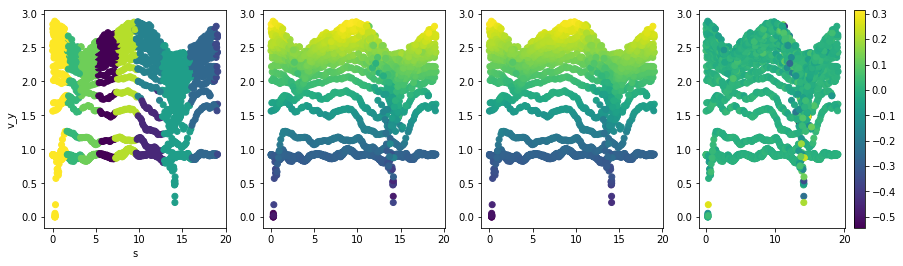

In [43]:
yhats_ind = []
yhats = []
for i in range(z.shape[0]):
    yhat = thetas[int(cluster_labels[i])].transpose().dot(np.hstack([z[i], 1]))
    yhats_ind.append(yhat[y_ind])
    yhats.append(yhat)
    


plt.figure(figsize=[15,4]); 
plt.subplot(1,4,1)
plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=cluster_labels); #plt.axis('equal'); plt.colorbar()
plt.xlabel('s')
plt.ylabel('v_y')
plt.subplot(1,4,2)
plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=y[:,y_ind]); #plt.axis('equal'); plt.colorbar()
plt.subplot(1,4,3)
#plt.imshow(yhat, interpolation='none', origin='lower',  extent=(min(x), max(x), min(x), max(x)))
plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=yhats_ind); #plt.axis('equal'); plt.colorbar()
plt.subplot(1,4,4)
#plt.imshow(yhat, interpolation='none', origin='lower',  extent=(min(x), max(x), min(x), max(x)))
plt.scatter(z[:,z_ind[0]], z[:,z_ind[1]], c=(y[:,y_ind]-yhats_ind));  plt.colorbar() #plt.axis('equal');